### SVM Image Classification - Dataset EMNIST

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

#### Load Dataset

 <en>
 <en>
 
  __Image_File__:
 
    | Size <en>(Bytes)       |   Element       | Description            |
    |:---------------------: | :-------------: | :--------------------: |
    | 4                      | MAGIC NUMBER    | ($2051_{10}$)          |
    | 4                      | COUNT           | Number of images       |
    | 4                      | HEIGHT          | Height imagem          |
    | 4                      | WIDTH           | Width da imagem        | 
    | HEIGHT$\times$WIDTH    | IMG_1           | 1st image              |
    | HEIGHT$\times$WIDTH    | IMG_2           | 2nd image              |
    | $\vdots$               | $\vdots$        | $\vdots$               |
    | HEIGHT$\times$WIDTH    | IMG_COUNT       | last imagem            |
    |========================|=================|========================|

 <en>
 <en>

  __Labels_File__:
  
    | Size <en>(Bytes)       |   Element       | Description             |
    |:---------------------: | :-------------: | :---------------------: |
    | 4                      | MAGIC NUMBER    | ($2049_{10}$)           |
    | 4                      | COUNT           | Number of labels        |
    | 1                      | LABEL_1         | Label of 1st image      |
    | 1                      | LABEL_2         | Label of 2nd image      | 
    | $\vdots$               | $\vdots$        | $\vdots$                |
    | 1                      | LABEL_COUNT     | Label of last image     |
    |========================|=================|=========================|

 <en>
 <en>

In [2]:
# function to load images and labels

def load_images(images_path, labels_path):
    with open(images_path, 'rb') as file:
        magic_num = int.from_bytes(bytes=file.read(4), byteorder='big', signed=False)
        count = int.from_bytes(bytes=file.read(4), byteorder='big', signed=False)
        height = int.from_bytes(bytes=file.read(4), byteorder='big', signed=False)
        width = int.from_bytes(bytes=file.read(4), byteorder='big', signed=False)

        X = np.frombuffer(buffer=file.read(count*height*width), dtype='uint8')
        X = X.reshape(count, height*width)
    
    with open(labels_path, 'rb') as file:
        magic_num = int.from_bytes(bytes=file.read(4), byteorder='big', signed=False)
        count = int.from_bytes(bytes=file.read(4), byteorder='big', signed=False)

        y = np.frombuffer(buffer=file.read(count), dtype='uint8')
        y = y.reshape(count,)
    
    return X, y

In [3]:
# load train and test data

X_train, y_train = load_images(images_path='train-images', labels_path='train-labels')
X_test, y_test = load_images(images_path='test-images', labels_path='test-labels')

In [4]:
# verify unique classes

print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [5]:
# labels to match images

map_labels = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8 :'I', 9: 'J'}

y_train_labels = pd.Series(y_train).map(map_labels)
y_test_labels = pd.Series(y_test).map(map_labels)

print(y_train_labels.unique())
print(y_test_labels.unique())

['F' 'I' 'G' 'D' 'A' 'B' 'J' 'H' 'C' 'E']
['D' 'F' 'J' 'C' 'H' 'I' 'A' 'G' 'E' 'B']


#### Dataset shape

In [6]:
# info about the train and test sets
print(f'Shape X_train: {X_train.shape}, Shape y_train: {y_train.shape}, Min: {np.min(X_train)}, Max: {np.max(X_train)}, type: {type(X_train)}, dtype: {X_test.dtype}')
print(f'Shape X_test: {X_test.shape}, Shape y_test: {y_test.shape}, Min: {np.min(X_test)}, Max: {np.max(X_test)}, type: {type(X_test)}, dtype: {X_test.dtype}')

Shape X_train: (60000, 784), Shape y_train: (60000,), Min: 0, Max: 255, type: <class 'numpy.ndarray'>, dtype: uint8
Shape X_test: (10000, 784), Shape y_test: (10000,), Min: 0, Max: 255, type: <class 'numpy.ndarray'>, dtype: uint8


#### Sample Images

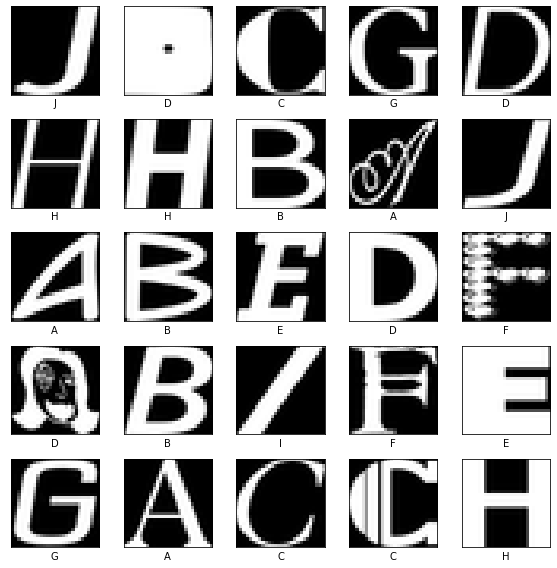

In [7]:
np.random.seed(25)
indexes = np.random.randint(low=0, high=60000, size=25)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(indexes):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[idx].reshape(28, 28), cmap='gray')
    plt.xlabel(y_train_labels[idx])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

#### Scale Data

In [8]:
# scale values

X_train = X_train / 255
X_test = X_test / 255

#### Model

In [9]:
%%time
svc = SVC(C=12, kernel='rbf', tol=1e-3, random_state=25)
svc.fit(X_train, y_train)

Wall time: 9min 29s


SVC(C=12, random_state=25)

#### Prediction

In [10]:
#y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

In [11]:
#y_pred_train_labels = pd.Series(y_pred_train).map(map_labels)
y_pred_test_labels = pd.Series(y_pred_test).map(map_labels)

#### Results

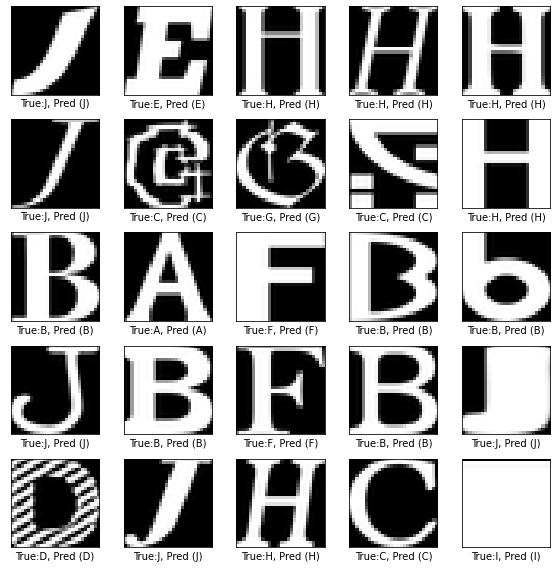

In [12]:
indexes2 = np.random.randint(low=0, high=10000, size=25)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(indexes2):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.xlabel(f'True:{y_test_labels[idx]}, Pred ({y_pred_test_labels[idx]})')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

#### Classification Report

In [13]:
print(classification_report(y_test_labels, y_pred_test_labels))

              precision    recall  f1-score   support

           A       0.94      0.96      0.95      1000
           B       0.93      0.95      0.94      1000
           C       0.95      0.95      0.95      1000
           D       0.96      0.95      0.96      1000
           E       0.95      0.94      0.94      1000
           F       0.96      0.96      0.96      1000
           G       0.94      0.94      0.94      1000
           H       0.97      0.95      0.96      1000
           I       0.94      0.92      0.93      1000
           J       0.94      0.96      0.95      1000

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



#### Confusion Matrix

In [14]:
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

[[965   8   0   2   2   1   5   8   5   4]
 [  6 949   5  14   6   3   9   3   4   1]
 [  2   3 954   4  12   5  13   2   5   0]
 [  6  15   3 952   3   4   4   2   5   6]
 [  3  14  13   2 939   7   8   5   7   2]
 [  6   6   2   1   7 956   4   2   6  10]
 [  4   6  16   4   6   7 943   1   6   7]
 [ 15  12   2   1   4   5   3 946   7   5]
 [ 13   4   7   6   5   8   6   2 922  27]
 [  4   4   3   3   4   5   6   0  14 957]]


Text(114.0, 0.5, 'True')

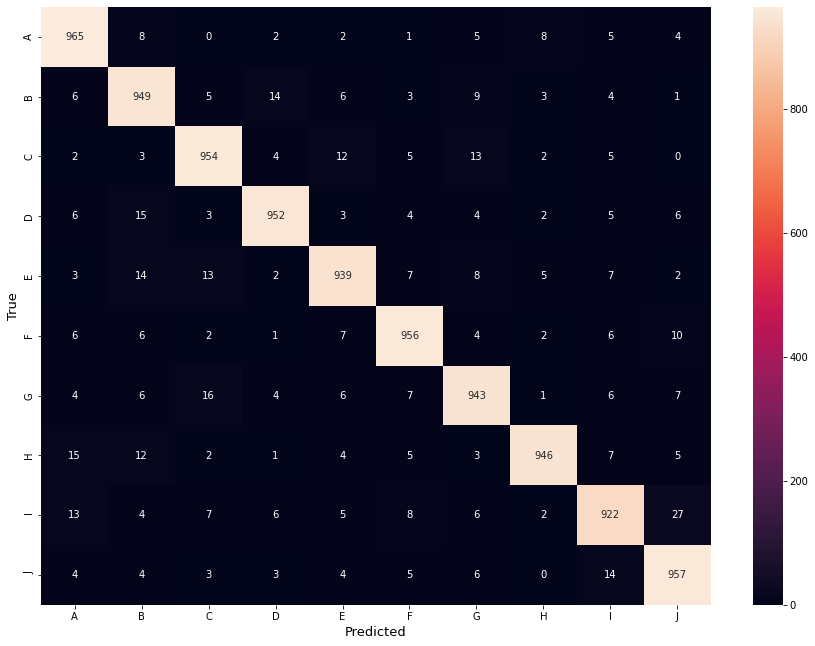

In [15]:
plt.figure(figsize=(15, 11))
sns.heatmap(cm, annot=True, xticklabels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], yticklabels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], fmt='.0f')
plt.xlabel('Predicted', size=13)
plt.ylabel('True', size=13)